# 形态转化cv2.erode(),cv2.dilate(),cv2.morphotogyEx()
形态变换是一些基于图像形状的简单操作。通常在二进制图像上执行。它需要两个输入，一个是我们的原始图像，第二个是决定操作性质的结构元素或内核。两种基本的形态学算子是侵蚀和膨胀。然后，它的变体形式（如“打开”，“关闭”，“渐变”等）也开始起作用。

## 侵蚀
将根据内核的大小丢弃边界附近的所有像素。因此，前景对象的厚度或大小会减小，或者图像中的白色区域只会减小。这对于消除小的白噪声（如我们在色彩空间一章中看到的），分离两个连接的对象等非常有用。
## 扩张
如果内核下方至少一个像素为“ 1”，则像素元素为“ 1”。因此，它会增加图像中的白色区域或增加前景对象的大小。通常，在消除噪音的情况下，腐蚀后会膨胀。因为腐蚀会消除白噪声，但也会缩小物体。因此，我们对其进行了扩展。由于噪音消失了，它们不会回来，但我们的目标区域增加了。在连接对象的损坏部分时也很有用。

In [1]:
import cv2
import numpy as np
img = cv2.imread('mudanhua3.jpg',0)

# 内核
kernel = np.ones((2,2),np.uint8)
# 腐蚀
erosion = cv2.erode(img,kernel,iterations=1) # 1：迭代次数
        # #iteration的值越高，模糊程度(腐蚀程度)就越高切呈正相关关系且只能是整数
# 扩张、膨胀
dilation = cv2.dilate(erosion,kernel,iterations=1)

cv2.imshow('img',img)
cv2.imshow('erosion',erosion)
cv2.imshow('dilation',dilation)
cv2.waitKey(0)&0xFF == ord('q')
cv2.destroyAllWindows()


##  开运算 cv2.morphologyEx（cv2.MORPH_OPEN）
先侵蚀在扩张，消除噪音


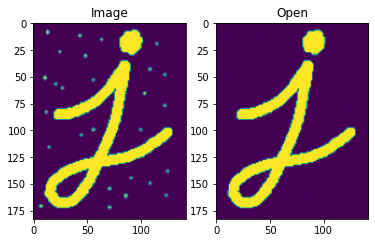

In [60]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('j_open.png',0)

kernel = np.ones((5,5),np.uint8)
opening = cv2.morphologyEx(img,cv2.MORPH_OPEN,kernel)

# cv2.imshow('img',img)
# cv2.imshow('opening',opening)
# # cv2.imshow('dilation',dilation)
# cv2.waitKey(0)&0xFF == ord('q')
# cv2.destroyAllWindows()

plt.subplot(121),plt.imshow(img),plt.title('Image')
plt.subplot(122),plt.imshow(opening),plt.title('Open')
plt.show()


## 闭运算 cv2.morphotogyEx（cv2.MORPH_CLOSE）
先膨胀再腐蚀，填充目标物体上的黑色噪点

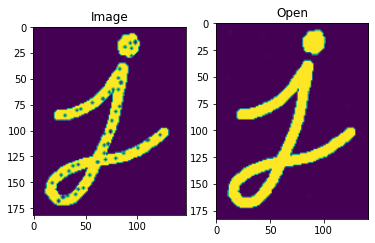

In [66]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('j_close.png',0)

kernel = np.ones((5,5),np.uint8)
closing = cv2.morphologyEx(img,cv2.MORPH_CLOSE,kernel)

# cv2.imshow('img',img)
# cv2.imshow('close',opening)
# # cv2.imshow('dilation',dilation)
# cv2.waitKey(0)&0xFF == ord('q')
# cv2.destroyAllWindows()

plt.subplot(121),plt.imshow(img),plt.title('Image')
plt.subplot(122),plt.imshow(opening),plt.title('Open')
plt.show()

## 形态梯度  cv2.morphologyEx(cv2.MORPH_GRADIENT)
一幅图像膨胀与腐蚀的差别。

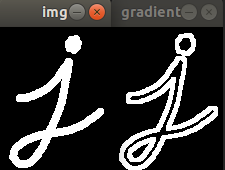

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('j.png',0)

kernel = np.ones((5,5),np.uint8)
gradient = cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)

cv2.imshow('img',img)
cv2.imshow('gradient',gradient)
# cv2.imshow('dilation',dilation)
cv2.waitKey(0)&0xFF == ord('q')
cv2.destroyAllWindows()

# plt.subplot(121),plt.imshow(img),plt.title('Image')
# plt.subplot(122),plt.imshow(opening),plt.title('gradient')
# plt.show()

## Top Hat 高帽  cv2.morphologyEx(cv2.MORPH_TOPHAT)
原始图像与进行开运算之后得到的图像的差。

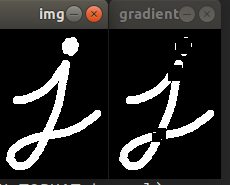

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('j.png',0)

kernel = np.ones((9,9),np.uint8)
tophat = cv2.morphologyEx(img,cv2.MORPH_TOPHAT,kernel)

cv2.imshow('img',img)
cv2.imshow('tophat',gradient)
# cv2.imshow('dilation',dilation)
cv2.waitKey(0)&0xFF == ord('q')
cv2.destroyAllWindows()

# plt.subplot(121),plt.imshow(img),plt.title('Image')
# plt.subplot(122),plt.imshow(opening),plt.title('gradient')
# plt.show()

## Black Hat  cv2.morphotogyEx(cv2.MORPH_BLACKHAT)
进行闭运算之后得到的图像与原始图像的差。

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('j.png',0)

kernel = np.ones((9,9),np.uint8)
blackhat = cv2.morphologyEx(img,cv2.MORPH_BLACKHAT,kernel)

cv2.imshow('img',img)
cv2.imshow('blackhat',blackhat)
# cv2.imshow('dilation',dilation)
cv2.waitKey(0)&0xFF == ord('q')
cv2.destroyAllWindows()

# plt.subplot(121),plt.imshow(img),plt.title('Image')
# plt.subplot(122),plt.imshow(opening),plt.title('gradient')
# plt.show()

## 核结构  cv2.getStructuringElement（）

In [78]:
#矩形内核
cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [80]:
#椭圆内核
cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))

array([[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [81]:
#十字形内核
cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

# 图像渐变 Image Gradients
梯度滤波器，或者说高通滤波器：cv2.Sobel(), cv2.Scharr(), cv2.Laplacian()

## sobel算子
Sobel算子是高斯平滑与微分操作的结合体，它的抗噪音能力很好。可以设定求导的方向（xorder或yorder）。还可以设定使用的卷积核的大小（ksize），如果ksize=-1，会使用3x3的Scharr滤波器，效果会更好，若速度相同，在使用3x3滤波器时尽量使用Scharr。
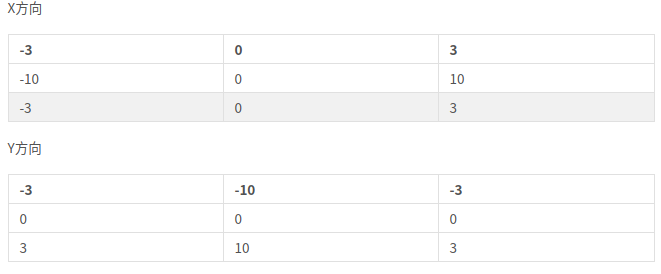
## Laplacian算子
拉普拉斯算子可以使用二阶导数的形式定义，可假设其离散实现类似于二阶Sobel导数，事实上OpenCV在计算拉普拉斯算子时直接调用Sobel算子。
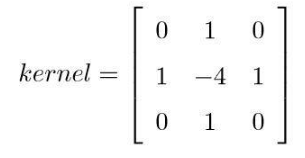

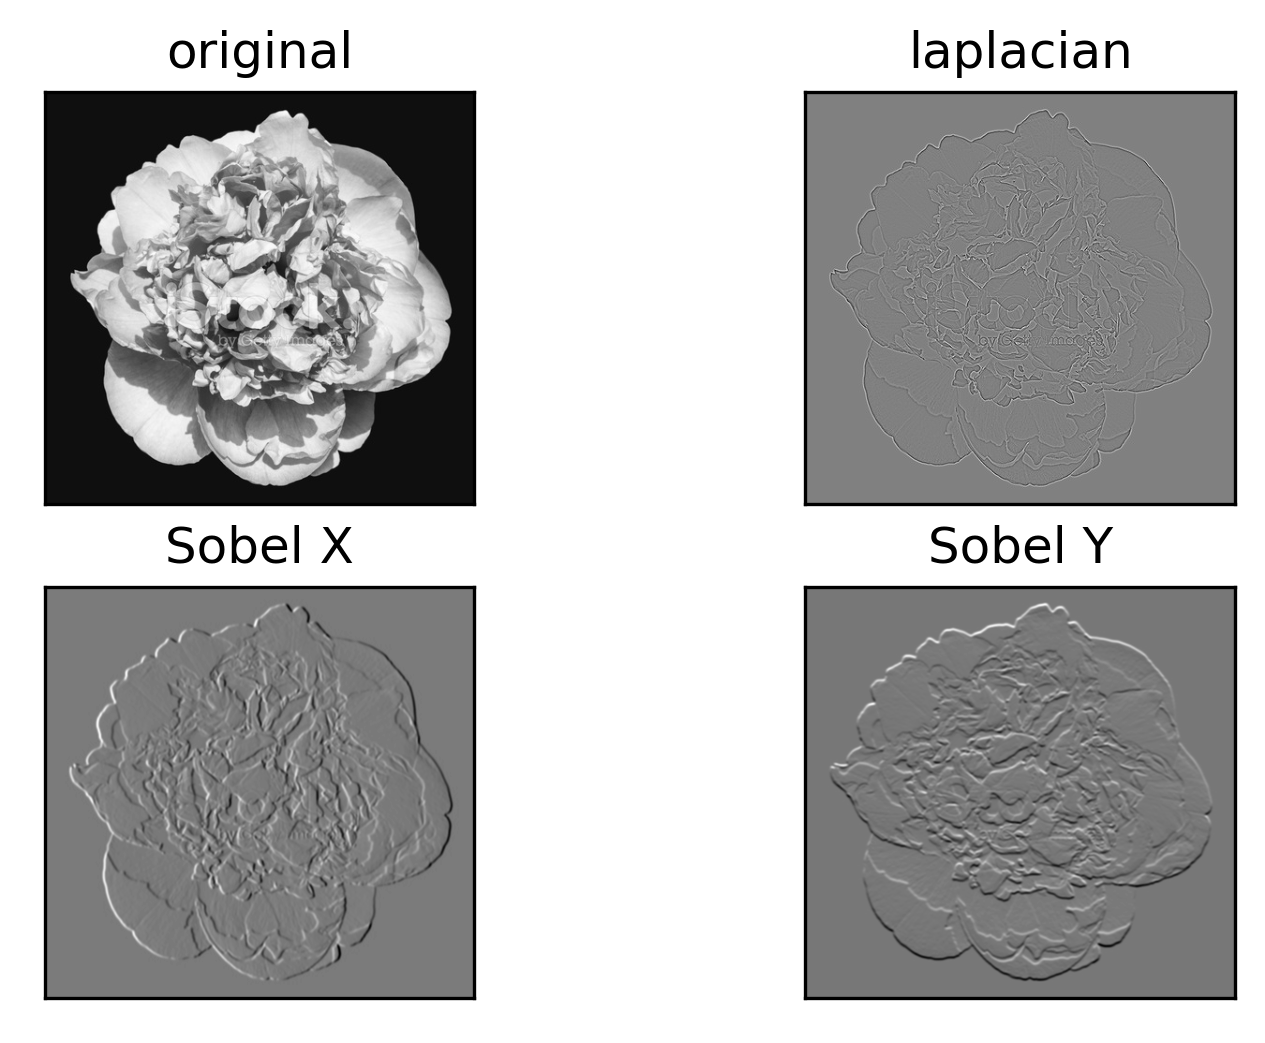

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
plt.rcParams['savefig.dpi'] = 300 #图片像素
plt.rcParams['figure.dpi'] = 300 #分辨率


img = cv2.imread('mudanhua2.jpg',0)

laplacian = cv2.Laplacian(img,cv2.CV_64F)  #cv2.CV_64F表示64位浮点数即64float。
# 图像边缘处理sobel细节
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5) # 对x差分
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5) # 对y差分
#第三和第四个参数分别是对X和Y方向的导数（即dx,dy），对于图像来说就是差分，这里1表示对X求偏导（差分），0表示不对Y求导（差分）。其中，X还可以求2次导。
plt.subplot(2,2,1),plt.imshow(img,cmap='gray')
plt.title('original'),plt.xticks([]),plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap='gray')
plt.title('laplacian'),plt.xticks([]),plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap='gray')
plt.title('Sobel X'),plt.xticks([]),plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap='gray')
plt.title('Sobel Y'),plt.xticks([]),plt.yticks([])

plt.show()
